### <center> Проект HW-02. Исследование причин оттока клиентов из банка

##### Практическое задание с Kaggle.

In [177]:
import pandas as pd


In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [179]:
import seaborn as sns

In [180]:
import plotly
import plotly.express as px

In [181]:
churn_data = pd.read_csv('data/churn.csv')
display(churn_data.shape)
churn_data.info()

(10000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### Столбцы таблицы:

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

##### Цель - установить основные причины оттока клиентов.


In [182]:
# Создаем копию исходных данных churn_data под новым названием churn_df
churn_df = churn_data.copy()
display(churn_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [183]:
# Удаляем столбец RowNumber
churn_df = churn_df.drop('RowNumber', axis=1)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Для более лучшего восприятия информации заменим числовые значения лоялности 0 и 1 на "loyal" и "disloyal". Обновленный вариант данных сохраним под новым названием "churn_df_new".

In [239]:
churn_df_new = churn_df.copy()
churn_df_new['Exited'] = churn_df_new['Exited'].apply(lambda x: 'loyal' if x == 0 else 'disloyal')
# Для удобства расположения информации на графике уменьшим размер каждого депозита в 1000 раз,
# а на графике будем пояснять что размерность указана в тыс.$
churn_df_new['Balance'] = churn_df_new['Balance'] / 1000
display(churn_df_new['CustomerId'].nunique())
#display(churn_df_new)

10000

=================================================================================

#### Задание 9.1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

-----------------------------------------------------------------------

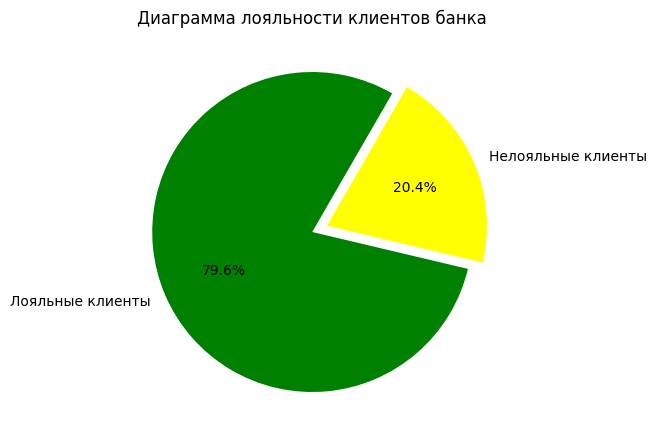

In [185]:
loyal_cl = churn_df['Exited'].value_counts()
fig = plt.figure(figsize=(4, 4)) # Задает размер фигуры
axes = fig.add_axes([0, 0, 1, 1])
plt.title('Диаграмма лояльности клиентов банка') # Название диаграммы
labels = ['Лояльные клиенты', 'Нелояльные клиенты'] # Название секторов
colors = ['green', 'yellow'] # Цвета секторов диаграммы
axes.pie(
    loyal_cl, # Исходные данные
    labels = labels,
    colors = colors,
    autopct ='%.1f%%', # Корректирует значение после запятой и доб. знак %
    explode = [0, 0.1], # Смещение секторов, в данном случае смещен один сектор на 10 %
    startangle = 60 # Угол поворота диаграммы  вокруг центральной оси
);

### Пояснительная и аналитическая информация к заданию 9.1.
* Для демонстрации лояльных и нелояльных клиентов банка мною выбрана круговая диаграмма, потому что лояльные и нелояльные клиенты это две части единого целого под названием клиентская база. Этот вариант диаграммы, на мой взгляд, наиболее информативно преподносит информацию для любого человека.

* Из диаграммы видно что лояльных клиентов в четыре раза больше чем нелояльных. На сколько плох или хорош данный показатель для банка, мне судить сложно. Я не работник банковской сферы и у меня нет сравнительной статистической информации от других банков. С коммерческой точки зрения доля своих клиентов размером в 20% заслуживает внимания и на мой взгляд этой группе клиентов (ушедших или тех кто вскором будующем собирается уйти) банку нужно уделять серьезное внимание. Нужно стремиться сокращать долю нелояльных клиентов, т.е. каким-то образом работать с ней.
Далее, можно будет конкретизировать какие действия стоит предпринять.


================================================================================

#### Задание 9.2.
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

----------------------------------------------------------------------

В начале определим минимальный и максимальный размер балланса среди всех клиентов.
Так же согласно условию задачи отфильтруем всех клиентов у кого баланс меньше 2500 долларов.

In [186]:
mask1 = churn_df_new['Balance'] > 2.5
mask2 = churn_df_new['Balance'] > 0
cl_2500p = churn_df_new[mask1]
cl_0p = churn_df_new[mask2]
display(cl_0p['Balance'].min())
display(cl_2500p['Balance'].max())

np.float64(3.76869)

np.float64(250.89809)

In [187]:
fig = px.histogram(
    data_frame = cl_2500p, #датафрейм
    x="Balance", #ось x
    labels={
        "Balance": "Распределение балансов клиентов, в тыс.$",
        "count": "Количество владельцев"},
    nbins = 50, # Кол-во столбцов (примерное)
    orientation='v', #ориентация графика
    height=600, #высота
    width=950, #ширина
    #title='Гистограмма распределения балансов клиентов' #заголовок
)
fig.update_layout(
    # Настройки для центрирования заголовка (title)
    title_text="Гистограмма распределения балансов клиентов",
    title_x=0.5)  # 0.5 означает 50% ширины от левого края, то есть центр
fig.update_traces(marker_line_width=1,  # Толщина линии: 1px
                  marker_line_color="black") # Цвет линии
#fig.update_xaxes(range=[2400, 252000]) # Можно задать диапазон по оси х
fig.update_layout(
    yaxis_title="Количество клиентов") 

#отображаем его
fig.show()

### Пояснительная и аналитическая информация к заданию 9.2.
* Для демонстрации распределение баланса пользователей, я выбрал гистограмму. Баланс является величиной непрерывной и поэтому этот показатель будет отложен по оси х. Соответственно показатель - количество клиентов, владеющих этими балансами, я отражу по оси у. На мой взгляд, гистограмма лучше любого другого графика доступно покажет требуемую информацию.

Итак что же мы видим на данной гистограмме. 
* Больше всего клиентов - это 898, располагают балансами в диапазоне от 120тыс. до 130тыс. долларов. Форма диаграммы близка к симметричной с некоторым количественным преимуществом клиентов с более низкими величинами баланса. Основу всех финансов составляют клиенты с балансом от 95тыс. до 140тыс.-145тыс. долларов. Из данной гистограммы видно, что банк активно работает с людьми разного достатка не акцентируюя внимания на богатых или наоборот, мало и среднеобеспеченных людей. Скорее всего у банка выработана своя стратегия поведения на рынке банковских услуг направленная на все слои населения. Особое внимание нужно уделять клиентам с балансов более 90тыс. долларов. Естественно, что внимательного отношения к себе заслуживают все клиенты. Так же мы видим выбросы - единичные случаи клиентов с балансом в 225тыс., 240тыс. 250тыс. долларов, а также единичные случаи с балансом в 3000, 12000 долларов.    

================================================================================

##### Задание 9.3.
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

----------------------------------------------------------------------

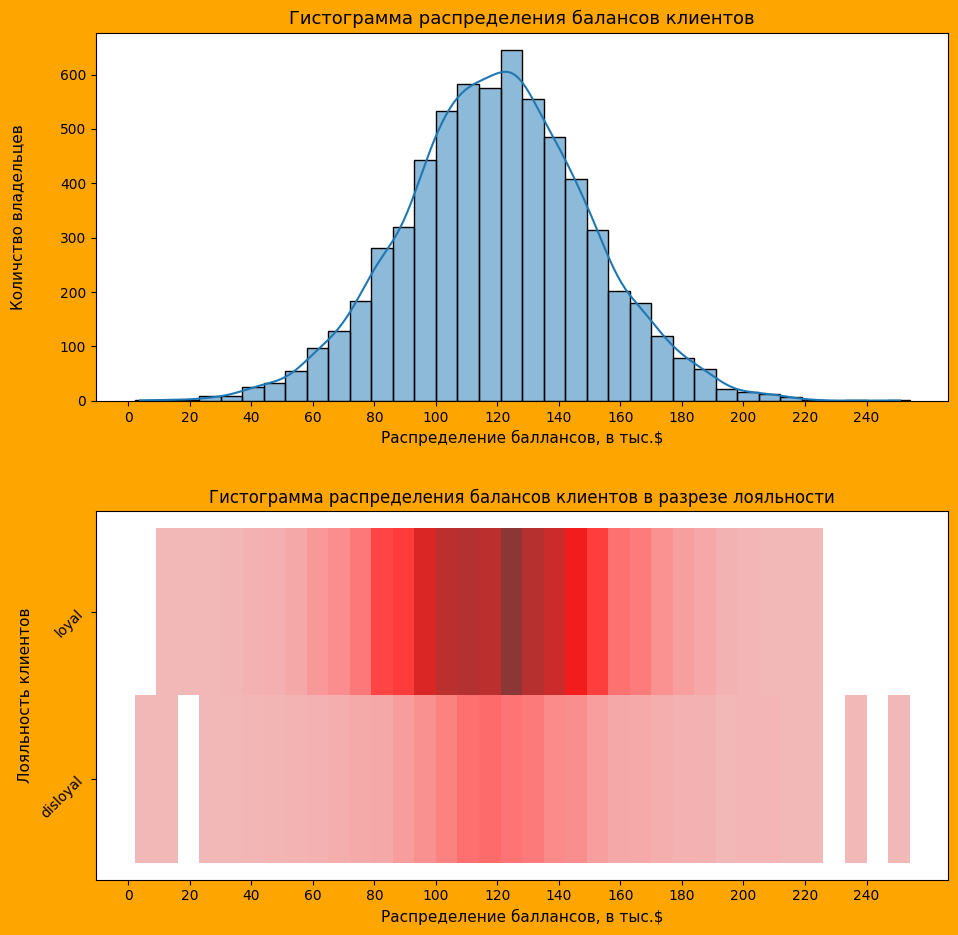

In [213]:
custom_bins = range(2, 260, 7)
# Задаем две координатные плоскости, указываем размер и цвет обрамления
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 11), facecolor='orange')
# Код ниже контролирует высоту пространства между соседними подграфиками в вертикальном направлении.
plt.subplots_adjust(hspace=0.3)
axes[0].set_title('Гистограмма распределения балансов клиентов', fontsize=13)
axes[1].set_title('Гистограмма распределения балансов клиентов в разрезе лояльности', fontsize=12)
axes[0].set_xlabel('Распределение баллансов, в тыс.$', fontsize=11)
axes[1].set_xlabel('Распределение баллансов, в тыс.$', fontsize=11)
axes[0].set_ylabel('Количство владельцев', labelpad=25, fontsize=11) # labelpad=25 - отступ от границ коорд. плоскости
axes[1].set_ylabel('Лояльность клиентов', fontsize=11)
#axes[0].xaxis.set_tick_params(rotation=45)
axes[1].yaxis.set_tick_params(rotation=45) # Возвожность повернуть метки относительно их центра
axes[0].set_xticks(range(0, 260, 20)) # Задаем диапавзон и шаг значений по оси х
axes[1].set_xticks(range(0, 260, 20))

sns.histplot(
    data = cl_2500p, # dataframe
    x='Balance', # Назвние столбца из которого будут извлечены данные для их размещения по оси х
    bins=custom_bins, # Кол-во столбцов
    kde=True, # Линия "сглаживания"
    ax=axes[0]
);
sns.histplot(
    data=cl_2500p,
    x='Balance',
    y='Exited',
    bins=custom_bins,
    color='red',
    ax=axes[1]
);

### Пояснительная и аналитическая информация к заданию 9.3.
* Для демонстрации какого-либо признака в разрезе другого признак лучше применять двойную гистограмму. На одной гистограмее (которая сверху) отображать один признак, а другой признак, который нужно отобразить в разрезе уже показывать на второй гистограмме (которая снизу). На нижней гистограмме распределения определяются не изменением формы фигуры, а изменением интенсивности цвета. Данный вид демонстрации признака в разрезе хорошо воспринимается, информативен и удобен для анализа.

Переходим к анализу гистограммы. Верхняя гистограмма будет вспомогательной, основную информацию будем черпать из нижней гистограммы.
* Анализируя нижний график можно сказать, что концентрация лояльных и нелояльных клиентов немного смещена относительно друг друга. У нелояльных клиентов основная концентрация наблюдается со смещением в сторону снижения баланса - это диапазон от 107тыс. до 121тыс. долларов, основная концентрация же лояльных клиентов смещается в сторону увеличения баланса - это диапазон от 121тыс. до 128тыс. долларов. Распределение нелояльнах клиентов можно характеризовать как равномерное т.е. одинаково распределено как в сторону снижения, так и в сторну увеличения баланса. У лояльных клиентов распределение - относительно равномерное, есть смещение в сторону увеличения баланса. Исходя из этого можно сделать следующее предположение. Условно разделим всех клиентов на две категории: к 1-ой категории отнесем клиентов которые чувствительны к различным "бонусам", а ко 2-ой категории тех клиентов, которых подобные мелочи не интересуют. Так вот, 2-я  категоря клиентов остается лояльной не зависимо от разных "плюшек", т.е. она остается лояльной не зависимо от того присылают ли им какие-либо бонусы, индивидуальные предложения и т.п. или нет. Нужно отметить, что клиентов из 2-ой категории значительно больше. Это утверждение из личного опыта. 1-я же категория будет остро реагировать на то, что банк их игнорирует.  
Если предположение верно, то можно утверждать, что граница определяющая размер балланса после которой банк начинает уделять особое внимание клиентам равна 120т. долларов, поэтому, для того чтобы  ситуация заметно изменилась, нужно снизить границу размера баланса для особого внимания до 93тыс. долларов, ну или хотябы до 100тыс. долларов. Так как это затронит достаточно большое количество клиентов, нужно учитывать как это повлияет на прибыльность банка и с учетом этого откорректировать вышеуказанную границу.   


================================================================================

##### Задание 9.4.
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

----------------------------------------------------------------------

Вначале выясним сколько категорий представлено в столбце с указанием возраста
Выясним минимальный и максимальный возраст клиентов

In [189]:
display(churn_df_new['Age'].nunique())
display(churn_df_new['Age'].min())
display(churn_df_new['Age'].max())


70

np.int64(18)

np.int64(92)

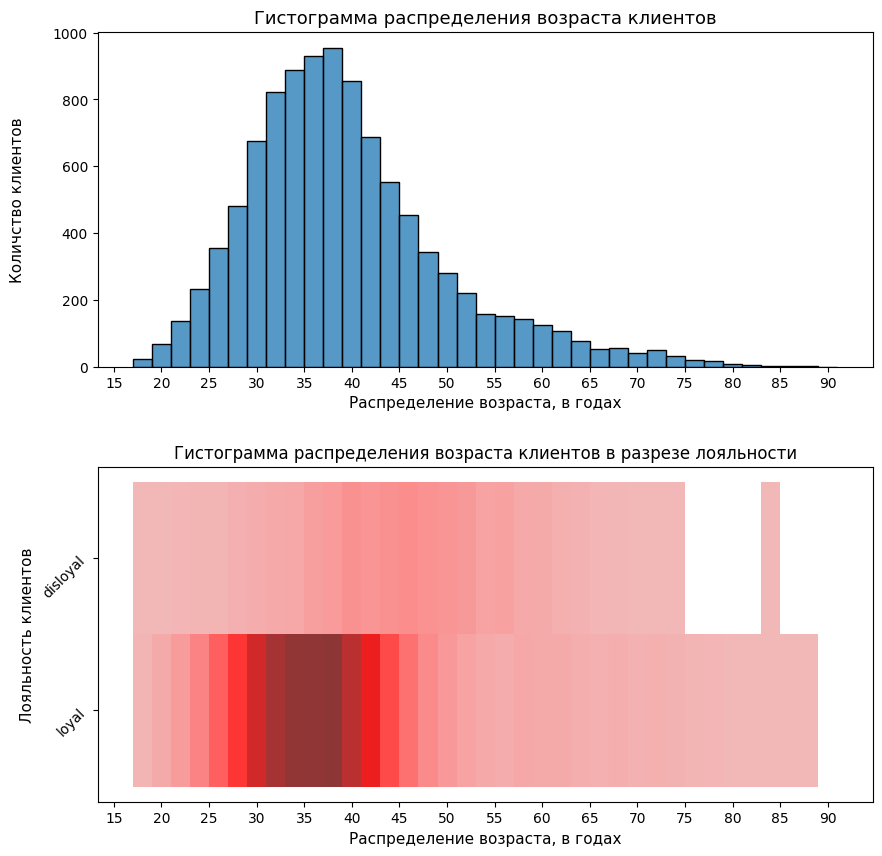

In [190]:
custom_bins = range(17,92, 2) # Задаем параметры по которым будет осуществляться разбивка по оси х
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)
axes[0].set_title('Гистограмма распределения возраста клиентов', fontsize=13)
axes[1].set_title('Гистограмма распределения возраста клиентов в разрезе лояльности', fontsize=12)
axes[0].set_xlabel('Распределение возраста, в годах', fontsize=11)
axes[1].set_xlabel('Распределение возраста, в годах', fontsize=11)
axes[0].set_ylabel('Количство клиентов', labelpad=20, fontsize=11)
axes[1].set_ylabel('Лояльность клиентов', fontsize=11)
axes[1].yaxis.set_tick_params(rotation=45)
axes[0].set_xticks(range(0, 100, 5))
axes[1].set_xticks(range(0, 100, 5))

sns.histplot(
    data = churn_df_new,
    x='Age',
    bins=custom_bins,
    #kde=True,
    ax=axes[0]
);
sns.histplot(
    data=churn_df_new,
    x='Age',
    y='Exited',
    bins=custom_bins,
    color='red',
    ax=axes[1]
);

### Пояснительная и аналитическая информация к заданию 9.4.
* Для выполнения задания 9.4. выбрана такая же диаграмма как и в задании 9.3. это двойная гистограмма. Обоснование выбора описано в задании 9.3.
* Проанализируем представленные гистограммы. Самая многочисленая группа клиентов - это клиенты в возрасте от 35 до 39 лет. Если смотреть шире, то основную базу клиентов составляет возрастная группа от 30 до 43 лет. Можно наблюдать более "длинное" распределение по более возрастным группам. Это соответствует жизненным циклам человека, поэтому такое распределение соответсвует норме. Клиенты более молодого возраста от 23 до 39 лет значительно лояльнее к банку чем клиенты более зрелого возраста. Лояльных и не лояльных клиентов в возрасте от 57 лет и старше, примерно одинаковое количество. Самая спорная возрастная група это клиенты в возрасте от 39 лет 57 лет. Именно на эту возрастную группу стоит обратить внимание. Рассмотрим лояльность этой возрастной группы. От 39 лет и старше количество лояльных клиентов начинает снижаться, а количество нелояльных клиентов увеличиваться. В диапазоне от 49 до 51 года количество лояльных и не лояльных клиентов выравнивается. С 51 до 57 лет количество нелояльных клиентов становится больше. Хотя сумарное количество клиентов в возрасте старше 47 лет не столь велико, игнорировать их нельзя. Нужно дополнительно разбираться почему после достижения 43 лет заметное количество клиентов начинают терять доверие к выбранному ими банку и что с этим можно сделать. 
* Потенциальных выбрасов набдюдается больше в нелояльной группе клиентов, возраст которых превышает 80 лет. Данные выбросы нужно изучать отдельно, но скорее всего это какие-либо ошибки самих клиентов, связанные с их преклонным возрастом.

================================================================================

##### Задание 9.5.
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

----------------------------------------------------------------------

Определяем минимальную и максимальную величину кредитного рейтинга.
Так же определяем минимальную и максимальную величину предполагаемых зарплат клиентов.
Данные показания помогают правильно настроить параметры будующего диаграммы (графика).
В данном случае по оси у будет использовано логарифмическое масштабирование по оси у,
потому что разница между минимальной и максимальной величинами предполагаемых зарплат клиентов
больше чем в 10 раз.


In [214]:
display(churn_df_new['CreditScore'].min())
display(churn_df_new['CreditScore'].max())
display(churn_df_new['EstimatedSalary'].min())
display(churn_df_new['EstimatedSalary'].max())
display(churn_df_new['EstimatedSalary'].median())

np.int64(350)

np.int64(850)

np.float64(11.58)

np.float64(199992.48)

np.float64(100193.915)

In [237]:
fig = px.scatter(
    data_frame=churn_df_new, #датафрейм 
    title = 'Взаимосвязь кредитного рейтинга клиента и предполагаемой заработной платой',
    x = 'CreditScore', #ось абсцисс
    y = 'EstimatedSalary', #ось ординат
    color='Exited', #расцветка в зависимости от лояльности клиентов
    labels = {'CreditScore': 'Кредитный рейтинг',
              'EstimatedSalary': 'Предполагаемая зарплата'
              },
    orientation ='h',
    log_x=False, # — установка логарифмического масштаба по оси x;
    log_y=True, # установка логарифмического масштаба по оси y;
    width=900,
    height=700
)
fig.update_xaxes(
    showline=True,        # Показать линию оси
    linecolor='orange',   # Цвет линии рамки (оранжевый)
    linewidth=10,         # толщина линии         
    mirror=True,          # Отразить линию оси справа (для создания полной рамки)
    gridcolor='lightgrey' # Цвет линий сетки внутри графика
)
fig.update_yaxes(
    showline=True,        # Показать линию оси
    linecolor='orange',   # Цвет линии рамки (черный/темный)
    linewidth=10,         # толщина линии
    mirror=True,          # Отразить линию оси справа (для создания полной рамки)
    gridcolor='lightgrey' # Цвет линий сетки внутри графика
)
fig.update_layout(legend_title_text="Лояльность<br>  клиентов") # Изменение развания легенды с переносом слов
fig.show()

### Пояснительная и аналитическая информация к заданию 9.5.
* В данном случае при выборе графика показывающего взаимосвязь двух признаков я опирался на учебный материал см. Питон 13. Юнит 8. Искусство визуализации. Схема выбора типа визуализации. Мной выбрана - диаграмма рассеяния.

Переходим к изучению данного графика - диаграммы рассения. 
* Нужно помнить, что на данной диаграмме применено логарифмическое масштабирование по оси у, т.е. масштабироваласть предполагаемая заработная плата. Результирующая фигура на диаграмме похожа на сегмент с вертикальной узкой полосой по правому краю диаграммы. Подавляющая часть клиентов имют кредитный рейтинг более 490 ед. У клиентов с рейтингом меньше 490 ед. преобладает зарплата с размером от 50000 до 200000 долларов. Причем в этой группе большинство клиентов имеет доход больше 100000 долларов. У клиентов с  рейтингом от 490 ед. до 650 ед. вектор заработной платы падает, падение составляет (усредненное значение с низкой точностью) от 140тыс. до 70тыс. долларов, а начиная с 650 ед. до 850 ед. вектор зарплаты растет от 70тыс. до 150тыс. долларов (усредненное значение с низкой точностью). Нелояльные клиенты достаточно равномерно распределены по всей координатной плоскости. Это говорит о том что у нелояльности клиентов нет явной зависимости, ни от доходов, ни от кредитного рейтинга. Есть единичные случаи сгруппированности только нелояльных клиентов с высоким уровнем заработной платы (верхний левый угол поля диаграммы). Выводы из данной диаграммы можно делать, скорее, статистического характера:
1. Подавляющее большинство клиентов с предполагаемой заработной платой от 30тыс. до 196тыс. долларов имеют кредитный рейтинг 650 ед.
2. Кредитный рейтинг не зависит от заработной платы. Клиенты с низкими, средними и высокими доходами имеют примерно одинаковое распределение по кредитному рейтингу 

================================================================================

##### Задание 9.6.
Кто чаще уходит, мужчины или женщины?  Постройте график, который иллюстрирует это.
* Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

----------------------------------------------------------------------

В столбце Gender все значения заменим на теже самые значения, но только с переводом, для более 
понятного восприятия информации на диаграмме.
При помощи группировки создадим новый DF для создания диаграммы, согласно заданию.


In [216]:
churn_df['Gender'] = churn_df['Gender'].replace('Female', 'Female - Женщины').replace('Male', 'Male - Мужчины')
gender_ex = churn_df.groupby('Gender', as_index=False)['Exited'].mean()
display(gender_ex)

,Gender,Exited
0,Female - Женщины,0.250715
1,Male - Мужчины,0.164559


In [238]:
fig = px.pie(
    gender_ex, # dataframe
    title='Диаграмма оттока клиентов по гендерному признаку', # Название диаграммы
    values='Exited', # Название столбца из которого будут взяты значения для расчета доли
    hole = 0.4, # Зададим размер отверстия для формирования пончиковой диаграммы 
    names='Gender', # Название столбца из которого будут взяты значения для легенды
    color = 'Gender', # Какие данные нужно раскрасить и вкакие цвета
    color_discrete_map = {
        'Female - Женщины': 'hotpink',
        'Male - Мужчины': 'blue'
    })
    #labels = {'Gender': 'Гендерный признак', # labels- это данные для всплывающего окна, простой вариант.
    #         'Exited': 'Размер в процентах'},)
# Поменяем название в легенде 
fig.update_layout(title_x = 0.2, legend_title_text='<b>Гендерный<br>признак</b>', showlegend=True)
fig.update_traces(
    # Полностью настраиваемый шаблон всплывающего окна
    hovertemplate="<b>Доля</b> %{label}<br><b>от общего числа ушедших клиентов,</b> %<br><b><extra></extra>"
)
fig.show()

### Пояснительная и аналитическая информация к заданию 9.6.
* Выбор именно этого графика - пончиковой диаграммы, обусловлен тем фактором, что мужчины и женщины являются частью единого целого, в нашем случае это все нелояльные клиенты банка. Данны вид графика является одним из самых простых, понятных и информативных.
* Из данной диаграммы видно что среди всех нелояльных клиентов, женщин большинство - 60%. Этот факт можно расценивать как дополнительный аргумент в пользу моего предположения, которое я описывал при анализе задания 9.3. На мой взгляд женщины более чувствительны к различным бонусам, акциям, скидкам и т.п.

=================================================================================

##### Задание 9.7.
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.


----------------------------------------------------------------------

Группируем данные по банковскому продукту и высчитываем количество вхождений по лояльности

In [218]:
groups_prod = churn_df_new.groupby('NumOfProducts', as_index=False)['Exited'].value_counts()
display(groups_prod)

,NumOfProducts,Exited,count
0,1,loyal,3675
1,1,disloyal,1409
2,2,loyal,4242
3,2,disloyal,348
4,3,disloyal,220
5,3,loyal,46
6,4,disloyal,60


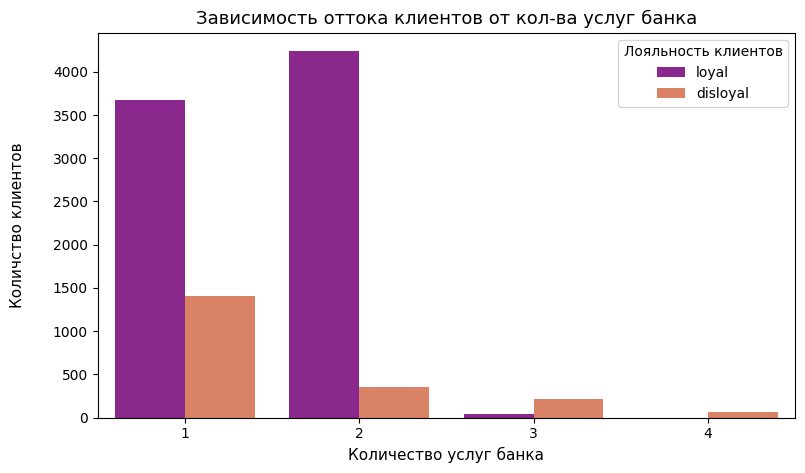

In [219]:
fig = plt.figure(figsize=(9, 5)) # Размер графика
barplot = sns.barplot(
    data=groups_prod, # dataframe
    x='NumOfProducts', # Название столбца, данные из которого будут отобажены на оси х
    y='count', # Название столбца данные из которого будут отабажены на оси у
    hue='Exited', # Название столбца данные из которого будут использованы (в данном случае на оси х),
                  # за добавление третьего измерения.
    palette="plasma"
)
barplot.set_title('Зависимость оттока клиентов от кол-ва услуг банка', fontsize=13) # Название диаграммы
barplot.set_xlabel('Количество услуг банка', fontsize=11) # Название оси х, с размером шрифта
barplot.set_ylabel('Количство клиентов', labelpad=20, fontsize=11) # Название оси у, с размером шрифта
barplot.legend_.set_title("Лояльность клиентов") # Название легенды

Для более полного понимания картины можно построить еще один график. Он будет показывать взаимосвязь 
оттока от количества приобретенных продуктов банка

In [220]:
of_prod_ex = churn_df.groupby('NumOfProducts', as_index=False)['Exited'].mean()
display(of_prod_ex)

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


In [230]:
fig = px.line(
    data_frame=of_prod_ex, #датафрейм
    x='NumOfProducts', #ось абсцисс
    y='Exited', #ось ординат
    height=500, #высота
    width=900, #ширина
    markers=True,
    labels={
        "NumOfProducts": "Кол-во приобретенных у банка продуктов",  # Переименование оси X
        "Exited": "Отток клиентов выраженый в долях"     # Переименование оси Y
    }
)
fig.update_traces(line=dict(width=4)) # Задаем толщину линии графика 6 ед.
fig.update_traces(marker=dict(size=12)) # Задаем диаметр точек маркера 12 ед.
fig.update_xaxes(range=[0.5, 4.5]) # Задаем диапазон значений по оси х
fig.update_xaxes(tickfont=dict(size=14)) # Задаем размер шрифта 14px для меток X
fig.update_yaxes(tickfont=dict(size=14)) # Задаем размер шрифта 14px для меток у
fig.update_xaxes(title_font=dict(size=18, family="Arial", color="black")) # Задаем размер шрифта 18px для названия X
fig.update_yaxes(title_font=dict(size=18, family="Arial", color="black")) # Задаем размер шрифта 18px для названия у
fig.update_layout(
    # Настройки для центрирования заголовка (title)
    title_text="Влияние кол-ва приобретенных у банка услуг на отток клиентов",
    title_x=0.5,  # 0.5 означает 50% ширины от левого края, то есть центр
    # Настройки для шрифта заголовка (title_font)
    title_font=dict(
        size=21, # Увеличенный размер шрифта (например, 21px)
        weight='bold', # Жирный шрифт заголовка
        family="Courier New, monospace", # Тип шрифта
        color="black")    # Цвет шрифта
    ) 
fig.show()

### Пояснительная и аналитическая информация к заданию 9.7.
* Для визуализации этого задания выбрана многоуровневая столбчатая диаграмма, я назову его - График 1. Выбор этого типа графика продиктован условиями задания. Кроме этого графика, для наглядности, мной был построен второй график - линейный, его я назову - График 2. Для  чего это было сделано я напишу ниже. 

Переходим к анализу
* На Графике 1 мы видим соотношение лояльных и нелояльных клиентов, в зависимости от количества приобретенных ими услуг. Клиенты, которые приобрели одну из 4-х банковских услуг составляют половину всех клиентов банка. В этой группе число нелояльных клиентов составляет - 28%. Т.е. соотношение лояльных и нелояльных клиентов из этой группы не соответствует соотношению лояльных и нелояльных клиентов указанным в задание 9.1. Напомню, среди 100% клиентов  число нелояльных клиентов составляяет - 20,4% и это является плохим признаком. Зададимся вопросом, будет ли приобретать клиент какую-либо банковскую услугу будучи нелояльно настроеным по отношению к своему банку? Думаю что нет. Значит, после покупки одной услуги, через какое-то время, у клиента наступает разочароване. Отсюда напрашивается вывод, что оказанная услуга не соответствует ожиданиям клиента. Это может быть завышенная стоимость услуги, либо невозможность выполнения каких-либо условий, входящих в данную услугу, либо что-то другое.

* У клиентов, которые приобрели две из 4-х услуги банка, соотношение лояльных и нелояльных клиентов резко меняется в сторону банка. В этой группе число нелояльных клиентов составляет - 7,6%. Значит можно отметить, что после преобретения 2-ух банковских услуг клиенты, в целом, остались довольны покупкой. 

* При изучении клиентов, которые купили три из 4-х банковских услуг картина резка меняется в негативную для банка сторону. Общее количество клиентов этой группы несопоставимо мало по сравнению с группами описанными выше, но здесь важна тенденция. Число нелояльных клиентов в этой группе составляет - 82,7%, а лояльных = 17,3%. Прежде чем делать окончательные выводы нужно рассмотреть группу клиентов, которые купили 4-е банковские услуги из 4-х.

* Итак, рассмотрим клиентов котрые купили 4-е банковские услуги из 4-х. Количество клиентов купивших 4-е услуги в абсолютном выражении составляет 60 человек и среди этих людей нет ни одного лояльного клиента. Из 60-и, ни одного лояльного клиента. 60 человек это 0,6% от общего количества клиентов. Как статистической величиной ею можно пренебречь, но мы рассмотрим эту величину как продолжение тенденции. В этом смысле визуализируем данные используя График 2, который показывает прямую зависимость нелояльных клиентов, в долях, к количеству приобретенных у банка услуг. Из графика видно, что приобретение 3-й и 4-ой услуги, соответственно, увеличивают отток клиентов из банка.

* Какие выводы можно сделать.  Налицо факт того, что платные банковские услуги требуют серъезных  изменений. Нужно тщательно изучить каждую услугу. Судя по диаграмме можно утверждать, что две услуги из четырех оправдывают ожидания клиентов. Вот только какие конкретно эти две услуги, выбранные вразнобой или  одинаковае (например, только услуги под №1 и №2 или только услуги №2 и №3), этого в исходных данных  не указано (поэтому мы можем оперировать только количественными характеристиками). Здесь нужны дополнительные исследования. Специалистам банка нужно тщательно изучить что они предлагают своим клиентам в качестве платных услуг. Важно обращать внимание даже на мелкие, кажущиеся не значительными детали. Возможно в этих услугах есть противоречия или взаимоисключающие моменты, а может быть дублирование одной или нескольких операций между услугами. Возможно они(услуги) или часть из них просто устарели и не соответствуют требованиям времени. Разносторонний подход должен выявить проблемные места. Конечным результатом работы должны стать новые или переработанные, адаптированные к клиентам платные банковские услуги!

=================================================================================

##### Задание 9.8.
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

----------------------------------------------------------------------

Создадим новый DF "groups_active" сгруппировав данные из столбца 'IsActiveMember' по параметрам активности с разбивкой по лояльным и не лояльным клиентам.

Для наглядности параметры "1" - активный и "0" - не активный заменим на "active" и "inactive" 

In [222]:
groups_active = churn_df_new.groupby('IsActiveMember', as_index=False)['Exited'].value_counts()
groups_active['IsActiveMember'] = groups_active['IsActiveMember'].apply(lambda x: 'inactive' if x == 0 else 'active')
display(groups_active)

,IsActiveMember,Exited,count
0,inactive,loyal,3547
1,inactive,disloyal,1302
2,active,loyal,4416
3,active,disloyal,735


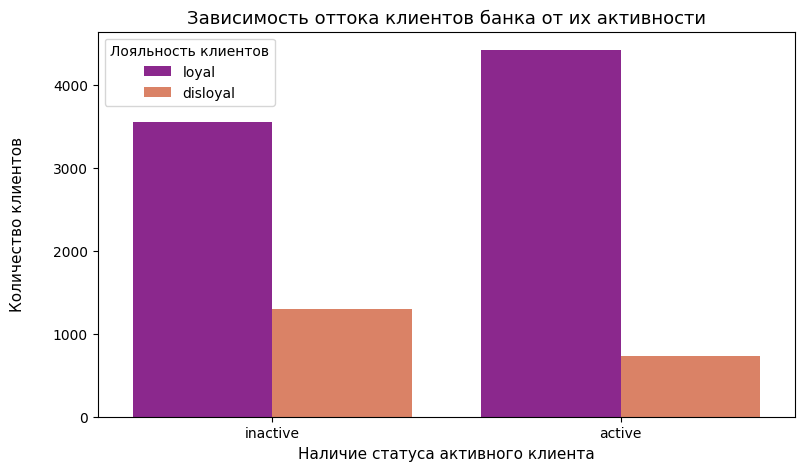

In [223]:
fig = plt.figure(figsize=(9, 5)) # Размер фигуры
barplot = sns.barplot(
    data=groups_active, # dataframe
    x='IsActiveMember', # Название столбца данные из которого будут отображены на оси х 
    y='count', # Название столбца данные из которого будут отображены на оси у
    hue='Exited', # # Название столбца данные из которого будут использованы (в данном случае на оси х),
                  # на добавление третьего измерения.
    palette="plasma" # Цветовая палитра
)
barplot.set_title('Зависимость оттока клиентов банка от их активности', fontsize=13)
barplot.set_xlabel('Наличие статуса активного клиента', fontsize=11)
barplot.set_ylabel('Количество клиентов', labelpad=20, fontsize=11)
barplot.legend_.set_title("Лояльность клиентов")

Практически тоже самое можно отобразить на тепловой карте

In [245]:
pivot = groups_active.pivot_table(
    values='count',
    columns='IsActiveMember',
    index='Exited',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

IsActiveMember,active,inactive
Exited,,
disloyal,735.0,1302.0
loyal,4416.0,3547.0


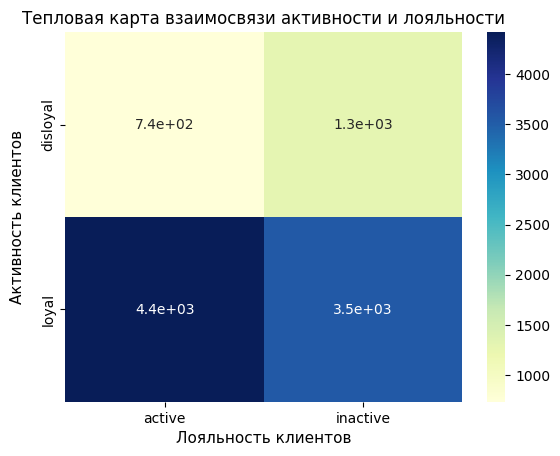

In [251]:
heatmap = sns.heatmap(data=pivot, annot=True, cmap='YlGnBu')
heatmap.set_title('Тепловая карта взаимосвязи активности и лояльности', fontsize=12)
heatmap.set_xlabel('Лояльность клиентов', fontsize=11)
heatmap.set_ylabel('Активность клиентов', labelpad=12, fontsize=11);

### Пояснительная и аналитическая информация к заданию 9.8.
* При выборе графиков для данного задания я выбирал между два вариантами диаграмм: первый вариант - это многоуровневая столбчатая диаграмма; второй вариант - это тепловая карта. Оба варианта мне понравились поэтому, несмотря на то что эти графики показывают одно и тоже, я решил оставить и тот, и другой. Обе диаграммы прекрасно отображают необходимую информацию, интуитивно понятны и не требуют каких-либо дополнительных графиков.

Анализ диаграммы.
* Разделим всех клиентов на две группы: первая - это клиенты, имеющие статус активного клиента; вторая - это клиенты, не имеющие статуса активного клиента. На диаграмме отлично видно что соотношение лояльных и нелояльным клиентов в первой группе(активные клиенты) значительно больше аналогичного соотношения во второй группе(некактивные клиенты). В первой группе количество нелояльных клиентов составляет - 14,3%, а во второй группе нелояльные клиенты составляют - 26,8%. Сравним данные показатели с общей статистикой по банку, указанной в задании 9.1. Напомню, среди 100% клиентов число нелояльных клиентов составляяет - 20,4%. Из этого можно сделать следующий вывод: вторая группа (неактивные клиенты) не является нейтральной группой по признаку оттока, эта группа тянет банк вниз, к снижению прибыльности. С этой группой нужно работать. Что можно сделать:
1. Изучить, в чем заключается активность клиентов из первой группы;
2. При каких условиях клиентам был присвоен статус - Активный;
3. Проанализировать, какие дополнительные действия со стороны банков смогут подтолькнуть клиентов стать более активными. Например, расширить список условий при которых клиентам присваивается статус - Активный. Естественно, что эти условия должны чем-то "цеплять" клиента.

=================================================================================

##### Задание 9.9.
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

----------------------------------------------------------------------

Формируем новый dataframe "country_ex" сгруппировав данные по странам и выделим для каждой страны средний 
коэф. оттока.

In [226]:
#churn_df['Geography'].value_counts()
country_ex = churn_df.groupby('Geography', as_index=False)['Exited'].mean()
display(country_ex)

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [ ]:
fig = px.choropleth(
    data_frame=country_ex, # датафрейм
    locations="Geography", # Столбец с локациями
    locationmode = "country names", # Режим сопоставления локаций с базой plotly
    color="Exited", # От чего зависит цвет
    #animation_frame="date", # Анимационный ползунок
    range_color=[0, 0.5], # Задаем в каком диапазоне изменят глубину цвета
    title='Доля ушедших клиентов среди стран, в которых представлен банк', # Заголовок
    width=800, # ширина
    height=500, # высота
    color_continuous_scale='Reds' # палитра цветов
)
fig.update_layout(coloraxis_colorbar=dict(title = "Отток клиентов<br> в долях")) # Изменение развания легенды с переносом слов
#отображаем его
fig.show()

C:\Users\Николай\AppData\Local\Temp\ipykernel_1944\1792471161.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



### Пояснительная и аналитическая информация к заданию 9.9.
* Для визуализации этого задания выбрана тепловая картограмма. Этот тип графика был выбран в соответствии с условиями задания. В контексте задания данная картограмма обладает высокой информативностью, понятна и привлекательна. Чтобы получить доступ к аннотации необходимо просто навести курсор на интересующую страну.

Переходим к анализу.
* Данный банк представлен в трех странах: Германия, Франция и Испания. На картограмме сразу бросается в глаза страна с самой яркой окраской. Именно она является той страной, в которой отток клиентов, в долях, самый большой. Это страна -Германия. Доля оттока в Германии составляет 0,32. В двух других станах, во Франции и Испании, доля оттока примерно одинаковая и составляет 0,16%.
* Среди представленных стран, Германия самая экономически развитая страна, в ней действуют более 1000 банков. Для сравнения во Франции и Испании количество банков не превышает 300. Из этого напрашивается простой вывод. В Германии банковская конкуренция в три раза выше чем во Франции и Испании; похоже на то что наш банк не выдерживает конкуренции на должном уровне. Люди могут вибирать между банками и, как видно из графика, зачастую их выбор складывается не в пользу данного банка. В условиях жесткой конкуренции банкам необходимо оттачивать клиентоориентированость чтобы оставаться на плаву.
* Что нужно сделать? 
Оптимальным решением будет изучение предложений конкурентов (более успешных банков) и их анализ. По результатам исследований следует разработать новые условия обслуживания или скорректировать существующие и внедрить их в работу.

================================================================================

##### Задание 9.10.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

----------------------------------------------------------------------

Как сказано в задание в начаде прменяем функцию get_credit_score_cat к столбцу "CreditScore".
Затем группируем DF "churn_df" по двум параметрам 'CreditScoreCat' и 'Tenure' с вычислением доли ушедших клиентов.

In [228]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
heat_map0 = churn_df.groupby(by=['CreditScoreCat', 'Tenure'], as_index=False)['Exited'].mean()
heat_map = heat_map0.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
)
display(heat_map)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


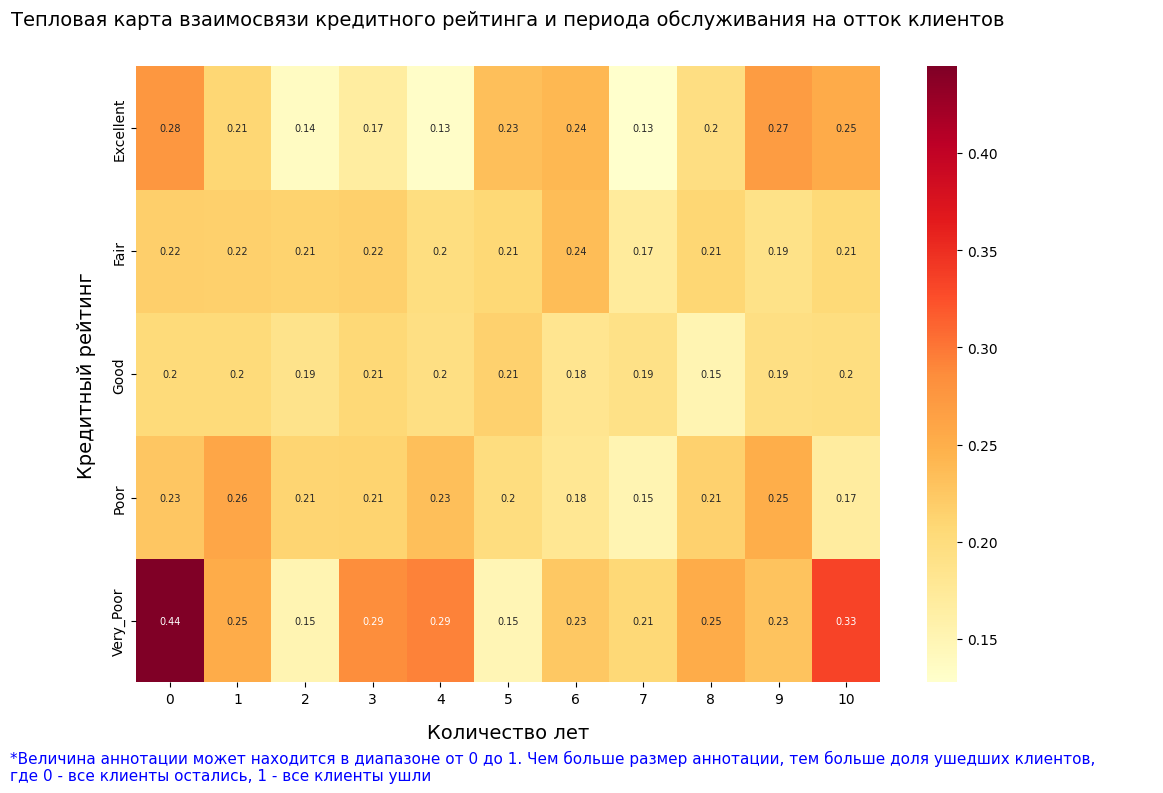

In [229]:
plt.figure(figsize=(12, 8))
# Параметры тепловой карты: data= DF, annot= аннотация, annot_kws={"fontsize": 7} - размер шрифта аннотации
# cmap='YlOrRd' - Цветовая палитра
ax = heatmap = sns.heatmap(data=heat_map, annot=True, annot_kws={"fontsize": 7}, cmap='YlOrRd')
plt.figtext(0.02, -0.009,   # Подпись снизу типа пояснения к тепловой карте
            "*Величина аннотации может находится в диапазоне от 0 до 1. Чем\
 больше размер аннотации, тем больше доля ушедших клиентов,             где 0 - все клиенты\
 остались, 1 - все клиенты ушли", 
            wrap=True, # Автоматический перенос текста (осуществлять перенос по словам)          
            horizontalalignment='left', # Местоположение  текста снизу по горизонтали
            fontsize=11, # Размер шрифта  текста снизу
            color='blue'), # Цвет шрифта  текста снизу
heatmap.set_title('Тепловая карта взаимосвязи кредитного рейтинга и периода обслуживания\
 на отток клиентов', pad=30, fontsize=14)
heatmap.set_xlabel('Количество лет', fontsize=14, labelpad=12)
heatmap.set_ylabel('Кредитный рейтинг', labelpad=12, fontsize=14);

### Пояснительная и аналитическая информация к заданию 9.10.
Для визуализации этого задания выбрана тепловая карта. Этот тип графика был выбран в соответствии с условиями задания.

Иследование тепловой карты.
* На тепловой карте информация представлена в виде изменения цвета, дополнительно для уточнения приведена аннотация. Итак перечислим категории клиентов, которые уходят чаще всего. Список сформируем по убыванию
1. Категория клиентов: период пользования менее 1 года, кредитный рейтинг 'very poor'(очень низкий) — демонстрирует максимальную склонность к оттоку". Доля оттока составляет 0,44, очень высокая.
2. Категория клиентов: период пользования 10 лет, кредитный рейтинг 'very poor'(очень низкий) — чуть менее склонны к оттоку. Доля оттока составляет 0,33, чуть ниже, но также высокая.
3. Категория клиентов: период пользования 3-4 года, кредитный рейтинг 'very poor'(очень низкий). Доля оттока составляет 0,29, остается выше средней.
4. Категория клиентов: период пользования менее 1 года, кредитный рейтинг 'Excellent'(очень высокий). Доля оттока составляет 0,28, остается выше средней.
5. Категория клиентов: период пользования 9 лет, кредитный рейтинг 'Excellent'(очень высокий). Доля оттока составляет 0,27, остается выше средней.
6. Категория клиентов: период пользования 1 год, кредитный рейтинг 'Poor'(низкий). Доля оттока составляет 0,26, остается выше средней.

Обобщеный вывод такой: более высокому оттоку соответствуют клиенты с очень низким или с очень высоким рейтингом и  мало зависимые от периода пользования услугами банка. Значит к данному виду клиентов можно отнести людей, которые наплевательски относятся к свом обязательствам перед банком, либо людей с чрезмерно завышенными требованиями к банкам.

